# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv(r"C:\Users\paro\Desktop\EDA_human_temperature\data\human_body_temperature.csv")

In [2]:
#Examine the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
#Summary stats of the fields
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
#First 5 sample observations
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
#take a look at a sample of observations
df.sample(10)

,temperature,gender,heart_rate
115,98.0,M,64.0
3,99.2,F,66.0
15,98.8,F,83.0
102,98.0,F,78.0
86,98.6,F,77.0
22,98.6,M,70.0
36,99.1,M,71.0
39,96.4,F,69.0
93,97.1,M,73.0
129,98.7,F,59.0


In [9]:
#Null values
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [10]:
#duplicate observations
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


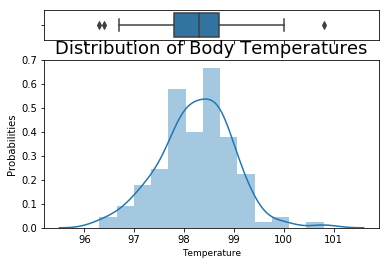

In [14]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)
# histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Label axes and add title:
plt.xlabel('Temperature', fontsize=9)
plt.ylabel('Probabilities')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

# Is the distribution of body temperatures normal?
The distribution of body temperatures as given by the above figures is normal. We take a look at the Cumulative Distribution Function to ensure that the above is correct.

In [15]:
def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

n = 130 
M = 98.24923076923078 
s = 0.7303577789050377


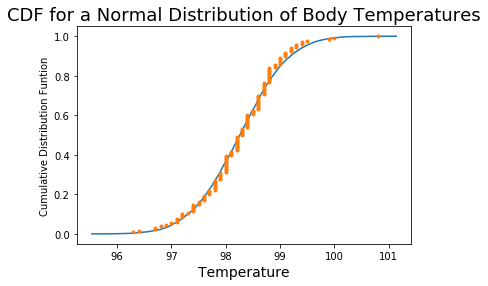

In [20]:
# Sample Size:
n = len(df.temperature)

# Sample Mean:
M = np.mean(df.temperature)

# Sample Standard Deviation:
s = np.std(df.temperature)

print('n =', n, '\nM =', M, '\ns =', s)

# Seed the random number generator:
np.random.seed(15)


# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

x_temp, y_temp = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature', fontsize=14)
fig = plt.ylabel('Cumulative Distribution Funtion')
fig = plt.title('CDF for a Normal Distribution of Body Temperatures', fontsize=18)


# Display the plots:
plt.show()


In [21]:
# Then using the normality test to check for normality
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)

# conduct hypothesis test
alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - that the data comes from a normal distribution - can be rejected")
else:
    print("The null hypothesis - that the data comes from a normal distribution - cannot be rejected")

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254
The null hypothesis - that the data comes from a normal distribution - cannot be rejected


## Answer- The data given for body temperatures is normally distributed.

# Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [25]:
# test central Limit Theorem's 1st condition: sample size to be greater than or equal to 30
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")
    
# Print the body temperature sample size:
print('Sample Size:', n)

The sample size is large (n > 30)
Sample Size: 130


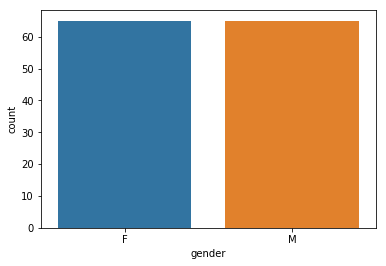

In [23]:
#Checking for independent observations
sns.countplot(df['gender'])

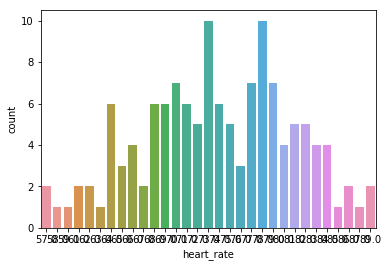

In [24]:
sns.countplot(df['heart_rate'])

## The sample size is large (n=130) and the observations are seen to be independent.

# Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
- Now try using the other test. How is the result be different? Why?

# Bootstrap Hypothesis Test

In [42]:
# Compute the 95% Confidence Interval, Bootstrap Replicate Approach
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # Compute Confidence Interval

# Compute Margin of Error, Bootstrap Replicate Approach
margin_of_error = 1.96 * bs_replicates.std()
print('The 95% confidence interval is from ', conf_int[0], ' to ', conf_int[1], '.')
print('The margin of error, as computed from the bootstrap replicates, is: ', margin_of_error)
print('Temperatures above and below the confidence interval are considered statistically abnormal.')

# Bootstrap Hypothesis Test
size = 1000
bs_replicates = np.empty(size)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'],len(df['temperature'])))
    
# Compute fraction of replicates that are equal to the 98.6
bs_replicates = np.around(bs_replicates, decimals=1) # Round to 1 decimal place
p = np.sum(bs_replicates == 98.6) / size

print('The null hypothesis is that the bootstrap replicating the means of body temperature is equal to 98.6.')
print('Given that p-value for bootstrap hypothesis test = ', p, ', we reject the null hypothesis.')

The 95% confidence interval is from  98.1  to  98.4 .
The margin of error, as computed from the bootstrap replicates, is:  0.1344815689973899
Temperatures above and below the confidence interval are considered statistically abnormal.
The null hypothesis is that the bootstrap replicating the means of body temperature is equal to 98.6.
Given that p-value for bootstrap hypothesis test =  0.0 , we reject the null hypothesis.


# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


- It is best to use a one-sample test since we are comparing data on human body temperatures to a single mean. 

- It is best to use a t-statistic since the population standard deviation is unknown. 

- A t-test is best for small samples, it becomes similar to the z-test with more data.


In [31]:
# one-sample t-test
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


In [32]:
# one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


In [33]:
# conduct hypothesis test for t-score
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")
else:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - cannot be rejected")

The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


## In the t-test, z-test, using bootstrap test, hacker statistics,  the p-value is significantly less than 0.01, so the null hypothesis is rejected that the true population mean is 98.6°F.

# Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [36]:
# Seed the random number generator:
np.random.seed(9)

# with a random sample of size 10
sample = np.random.choice(df['temperature'], size=10)

In [37]:
# one-sample t-test
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

# one-sample z-test
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

t-statistic: -2.8303102652218244
p value = 0.01971242210027643
z-statistic: -2.830310265221825
p value = 0.0046502883836390075


In [39]:
from scipy import stats
from scipy.stats import norm

In [40]:
# Quantiles of the t-distribution corresponding to confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

-2.262157162740992 2.2621571627409915


In [41]:
# Quantiles of the t-distribution corresponding to confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-4.780912585933472 4.7809125859335495


## We should use a t-test as the population standard deviation is unkown and the sample size of 10 is small

- The difference between the t and z tests shows that the t-distribution is wider so there is more variability, making this test less sensitive.

- The t-test gives us a 95% confidence level to reject the null hypothesis.

# At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

# Bootstrap Approach

In [51]:
# 95% Confidence Interval using Bootstrap Approach
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # Compute Confidence Interval

# Margin of Error using Bootstrap Approach
margin_of_error = 1.96 * bs_replicates.std()
print('The 95% confidence interval is from ', conf_int[0], ' to ', conf_int[1], '.')
print('The margin of error is: ', margin_of_error)

The 95% confidence interval is from  98.1  to  98.4 .
The margin of error is:  0.13375632237767207


# Frequentist approach

In [43]:
from scipy.stats import norm

In [48]:
#compute empiricle mean and standard deviation

#number of samples:
n = len(df['temperature'])

#sample mean:
x_bar = np.mean(df['temperature'])
print('Mean temperature = ', x_bar)

#sample standard deviation
std = np.std(df['temperature'])

print('Standard deviation = +/- ', std, 'degrees fahrenheit')
# 95% prediction interval:
PI = stats.norm.interval(0.95, loc=x_bar, scale=std)
print('95% Confidence Interval:', PI)

Mean temperature =  98.24923076923078
Standard deviation = +/-  0.7303577789050377 degrees fahrenheit
95% Confidence Interval: (96.81775582674824, 99.68070571171332)


In [46]:
# Critical value at 95% confidence:
z_critical = norm.ppf(0.975)
z_critical

1.959963984540054

In [52]:
# Margin of error:
moe = z_critical * std
print('Margin of Error:', moe)

# 95% prediction interval:
PI = np.array([x_bar - moe, x_bar + moe])
print('95% Confidence Interval:', PI)

Margin of Error: 1.4314749424825415
95% Confidence Interval: [96.81775583 99.68070571]


## Temperatures below 96.82 and above 99.68°F would be abnormal.

# Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

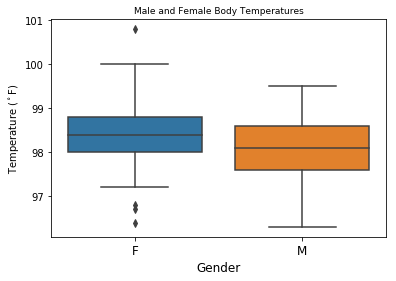

In [57]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=12)
fig = plt.xlabel('Gender', fontsize=12)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Male and Female Body Temperatures', fontsize=9)

# Display the plots:
plt.show()

In [58]:
# female and male temperatures:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)

Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


In [54]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [55]:
# conduct hypothesis test
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


In [59]:
# The quantiles of the t-distribution corresponding to confidence level and degrees of freedom:
print((stats.t.ppf(q=0.025, df=65-1)), (stats.t.ppf(q=0.975, df=65-1)))

-1.9977296536259739 1.9977296536259734


## We use a two-sample t-test to test for the difference between male and female body temperatures. The difference is significant and the null hypothesis that there is no difference is rejected.

## My inferences in the context of the original problem:
- The data given for body temperatures is normally distributed.
- The mean temperature for this sample of data is 98.2°F and not the conventional 98.6
- The sample size is large (n=130) and the observations are seen to be independent.
- Using a t-test, z-test, using bootstrap test, hacker statistics, the p-value is significantly less than 0.01, so the null hypothesis is rejected that the true population mean is 98.6°F.
- Using a t-test as the population standard deviation is unkown and the sample size of 10 is small, it gives us a 95% confidence level to reject the null hypothesis that the true population mean is 98.6°F.
- We find that the temperatures below 96.82 and above 99.68°F would be abnormal.
- using a two-sample t-test to test for the difference between male and female body temperatures, the null hypothesis that there is no difference is rejected.
- Hence, using the data, we infer that there is sufficient evidence to warrant rejection of the conventional wisdom  that the true population average is the conventional normal human body temperature of 98.6°F.